In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\Jay\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = pd.read_hdf('aa_one_hot_highlow.h5')

In [3]:
data.head()

,class,prest_id,conc_cf,aa_one_hot
1,0,140099,2.91540,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,0,140225,1.48770,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,0,140325,1.50290,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
8,0,140354,0.92003,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10,0,140500,2.21830,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [4]:
data.tail()

,class,prest_id,conc_cf,aa_one_hot
45201,1,4550047,12.28,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
45202,1,4550053,11.18,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
45203,1,4550054,10.94,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
45204,1,4560007,11.30,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
45205,1,4560013,9.38,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [9]:
data['aa_one_hot'][1].shape

(149, 20)

In [12]:
# create a 3D array of one one hot encodings
max_len = 149
width = 20
num_samples = data.shape[0]

X = np.zeros((num_samples, max_len, width))
for idx, aa_one_hot in enumerate(data['aa_one_hot'].values):
    X[idx, :, :] = aa_one_hot

    
y = data['class'].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [43]:
# simple model per Yoon Kim (2014)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D
model = Sequential()
model.add(Conv1D(10, 8, activation='relu', input_shape=(149, 20)))
model.add(GlobalMaxPooling1D())
# model.add(Flatten())
# model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=50, epochs=10,
          validation_data=(x_test, y_test), verbose=1)

Train on 15822 samples, validate on 6781 samples
Epoch 1/10
15822/15822 [==============================] - 6s 404us/step - loss: 0.7144 - acc: 0.5119 - val_loss: 0.6868 - val_acc: 0.5614
Epoch 2/10
15822/15822 [==============================] - 6s 375us/step - loss: 0.6859 - acc: 0.5497 - val_loss: 0.6799 - val_acc: 0.5856
Epoch 3/10
15822/15822 [==============================] - 6s 372us/step - loss: 0.6780 - acc: 0.5729 - val_loss: 0.6740 - val_acc: 0.6117
Epoch 4/10
15822/15822 [==============================] - 6s 391us/step - loss: 0.6714 - acc: 0.5880 - val_loss: 0.6687 - val_acc: 0.6166
Epoch 5/10
15822/15822 [==============================] - 6s 378us/step - loss: 0.6649 - acc: 0.6028 - val_loss: 0.6633 - val_acc: 0.6216
Epoch 6/10
15822/15822 [==============================] - 6s 397us/step - loss: 0.6613 - acc: 0.6036 - val_loss: 0.6615 - val_acc: 0.6189
Epoch 7/10
15822/15822 [==============================] - 6s 383us/step - loss: 0.6588 - acc: 0.6090 - val_loss: 0.6579 - v

In [44]:
#try to vizulaize the filters
weights = model.get_weights()

In [45]:
weights[0].shape

(8, 20, 10)

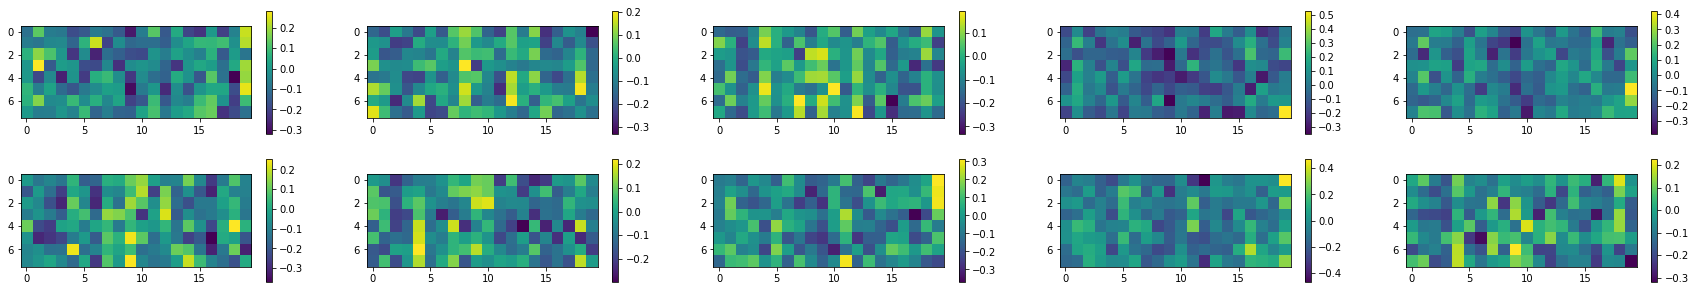

In [47]:
#I'm expecting 10 filters that are 8 x 20
#if I'm interpreting this correctly the weights[0] is and array [8x20 filter, 10 filters]

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,5))
for ind in range(1,11):
    w = weights[0][:,:,ind-1]
    plt.subplot(2,5,ind)
    plt.imshow(w)
    plt.colorbar()

since the data only has a single hot pixel in each row, I would expect to see similar patterns in the filters, but this doesn't look much like that so maybe there is some more work to be done here or my expecation is wrong.

In [ ]:
# Now trying to use an example based on Kim's paper.
# adapted from https://github.com/alexander-rakhlin/CNN-for-Sentence-Classification-in-Keras/blob/master/sentiment_cnn.py

In [24]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, MaxPooling1D, Convolution1D, Flatten
from keras.layers.merge import Concatenate

filter_sizes = (3, 4, 5)
num_filters = 10
dropout_prob = (0.5, 0.8)
hidden_dims = 50

# prepare input shape
input_shape = (149, 20)
model_input = Input(shape=input_shape)
z = model_input

# z = Dropout(dropout_prob[0])(z)

# Convolutional ddddblock
conv_blocks = []
for sz in filter_sizes:
    conv = Convolution1D(filters=num_filters,
                         kernel_size=sz,
                         padding="valid",
                         activation="relu",
                         strides=1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
# z = Flatten()(z)
z = Dropout(dropout_prob[1])(z)
# z = Dense(hidden_dims, activation="selu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model2 = Model(model_input, model_output)
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model2.fit(x_train, y_train, batch_size=50, epochs=10,
          validation_data=(x_test, y_test), verbose=2)

Train on 15822 samples, validate on 6781 samples
Epoch 1/10
 - 10s - loss: 0.7933 - acc: 0.5042 - val_loss: 0.6900 - val_acc: 0.5465
Epoch 2/10
 - 9s - loss: 0.7012 - acc: 0.5263 - val_loss: 0.6882 - val_acc: 0.5658
Epoch 3/10
 - 9s - loss: 0.6914 - acc: 0.5293 - val_loss: 0.6864 - val_acc: 0.5759
Epoch 4/10
 - 9s - loss: 0.6884 - acc: 0.5399 - val_loss: 0.6844 - val_acc: 0.5902
Epoch 5/10
 - 9s - loss: 0.6842 - acc: 0.5530 - val_loss: 0.6819 - val_acc: 0.5977
Epoch 6/10
 - 9s - loss: 0.6833 - acc: 0.5530 - val_loss: 0.6797 - val_acc: 0.5976
Epoch 7/10
 - 9s - loss: 0.6810 - acc: 0.5602 - val_loss: 0.6783 - val_acc: 0.5841
Epoch 8/10
 - 10s - loss: 0.6805 - acc: 0.5667 - val_loss: 0.6761 - val_acc: 0.6074
Epoch 9/10
 - 9s - loss: 0.6774 - acc: 0.5720 - val_loss: 0.6735 - val_acc: 0.6150
Epoch 10/10
 - 9s - loss: 0.6752 - acc: 0.5758 - val_loss: 0.6715 - val_acc: 0.6161


### the following architecture comes from the keras docs... seems to overfit

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(149, 20)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=50, epochs=10,
          validation_data=(x_test, y_test), verbose=1)

Train on 15822 samples, validate on 6781 samples
Epoch 1/10
15822/15822 [==============================] - 21s 1ms/step - loss: 0.6816 - acc: 0.5528 - val_loss: 0.6547 - val_acc: 0.6213
Epoch 2/10
15822/15822 [==============================] - 21s 1ms/step - loss: 0.6510 - acc: 0.6243 - val_loss: 0.6396 - val_acc: 0.6380
Epoch 3/10
15822/15822 [==============================] - 24s 2ms/step - loss: 0.6357 - acc: 0.6400 - val_loss: 0.6387 - val_acc: 0.6297
Epoch 4/10
15822/15822 [==============================] - 23s 1ms/step - loss: 0.6248 - acc: 0.6509 - val_loss: 0.6213 - val_acc: 0.6465
Epoch 5/10
15822/15822 [==============================] - 23s 1ms/step - loss: 0.6114 - acc: 0.6648 - val_loss: 0.6176 - val_acc: 0.6444
Epoch 6/10
15822/15822 [==============================] - 23s 1ms/step - loss: 0.5977 - acc: 0.6730 - val_loss: 0.6116 - val_acc: 0.6624
Epoch 7/10
15822/15822 [==============================] - 25s 2ms/step - loss: 0.5873 - acc: 0.6834 - val_loss: 0.6050 - val_acc: